## Excelファイルからのデータ取得

官公庁からのデータ提供はExcelファイルが多い（気がする）。
- ファイルでのデータ提供
- アプリケーションで開いた時に（誰でも）見やすい
- 余計な情報（取り扱いの注意事項等）が入っていることも多い
  - プログラムで処理する際には一手間増える

### データを探す

- デジタル庁 オープンデータサイト https://www.data.go.jp
- 総務省統計局 統計で見る日本 e-Stat https://www.e-stat.go.jp

### 有効求人倍率

厚生労働統計一覧 > 一般職業紹介状況(職業安定業務統計)<br>
http://www.e-stat.go.jp/SG1/estat/NewList.do?tid=000001020327
- 月次 > 有効求人倍率（実数、季節調整値） ... 第3表.xlsx

第3表.xlsx
- 年が行、月が列
- 1つの行に実数値、季節調整値が並んでいる

### Excelファイルの読み込み

1. まずは、そのまま読み込む

In [1]:
import pandas as pd

df_jobs = pd.read_excel('data/第3表.xlsx')
# 確認
df_jobs

,有効求人倍率（パートタイムを含む一般）,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,実数,実数,実数,実数,実数,実数,実数,実数,...,季節調整値,季節調整値,季節調整値,季節調整値,季節調整値,季節調整値,季節調整値,季節調整値,季節調整値,季節調整値
2,西暦,和暦,１月,２月,３月,４月,５月,６月,７月,８月,...,７月,８月,９月,10月,11月,12月,1～3月平均,4～6月平均,7～9月平均,10～12月平均
3,NaN,NaN,倍,倍,倍,倍,倍,倍,倍,倍,...,倍,倍,倍,倍,倍,倍,倍,倍,倍,倍
4,1963年,昭和38年,0.44,0.53,0.65,0.72,0.77,0.85,0.74,0.74,...,0.77,0.72,0.71,0.71,0.72,0.73,0.6,0.73,0.73,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2021年,令和３年,1.15,1.15,1.12,1.04,1.02,1.06,1.11,1.12,...,1.14,1.15,1.15,1.16,1.17,1.17,1.09,1.11,1.15,1.17
63,2022年,令和４年,1.27,1.28,1.25,1.17,1.15,1.19,1.26,NaN,...,1.29,NaN,NaN,NaN,NaN,NaN,1.21,1.25,NaN,NaN
64,（注1）昭和48年から沖縄を含む。ただし、昭和47年度平均には沖縄を含む。,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 上記のようにそのまま読み込んだDataFrameを処理することも可能

2. オプションを指定し、必要な箇所だけを読み込む
   - skiprows: 先頭行をスキップ
   - skipfooter: 末尾行をスキップ
   - usecols: 使用する列の指定
   - index_col: 行インデックスに用いる列の指定

In [2]:
df_jobs = pd.read_excel('data/第3表.xlsx', skiprows=3, skipfooter=3,
                        usecols='A,U:AF', index_col=0)
# 確認
df_jobs

,１月.1,２月.1,３月.1,４月.1,５月.1,６月.1,７月.1,８月.1,９月.1,10月.1,11月.1,12月.1
西暦,,,,,,,,,,,,
NaN,倍,倍,倍,倍,倍,倍,倍,倍,倍,倍,倍,倍
1963年,0.56,0.6,0.64,0.68,0.71,0.8,0.77,0.72,0.71,0.71,0.72,0.73
1964年,0.75,0.76,0.76,0.79,0.81,0.83,0.83,0.82,0.83,0.81,0.79,0.78
1965年,0.74,0.71,0.71,0.7,0.66,0.63,0.6,0.58,0.57,0.57,0.56,0.55
1966年,0.58,0.62,0.67,0.7,0.71,0.73,0.72,0.78,0.82,0.85,0.85,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...
2018年,1.6,1.59,1.59,1.59,1.6,1.61,1.63,1.63,1.64,1.63,1.63,1.63
2019年,1.63,1.63,1.62,1.62,1.62,1.6,1.59,1.6,1.59,1.59,1.57,1.57
2020年,1.49,1.45,1.39,1.31,1.18,1.12,1.08,1.05,1.04,1.05,1.05,1.06


3. 1行目は不要なため削除

In [4]:
df_jobs = df_jobs.drop(df_jobs.index[[0]])
# 確認
df_jobs

,１月.1,２月.1,３月.1,４月.1,５月.1,６月.1,７月.1,８月.1,９月.1,10月.1,11月.1,12月.1
西暦,,,,,,,,,,,,
1963年,0.56,0.6,0.64,0.68,0.71,0.8,0.77,0.72,0.71,0.71,0.72,0.73
1964年,0.75,0.76,0.76,0.79,0.81,0.83,0.83,0.82,0.83,0.81,0.79,0.78
1965年,0.74,0.71,0.71,0.7,0.66,0.63,0.6,0.58,0.57,0.57,0.56,0.55
1966年,0.58,0.62,0.67,0.7,0.71,0.73,0.72,0.78,0.82,0.85,0.85,0.85
1967年,0.87,0.9,0.91,0.94,0.97,1,1.02,1.08,1.09,1.09,1.11,1.1
1968年,1.11,1.09,1.08,1.07,1.09,1.1,1.11,1.12,1.14,1.14,1.17,1.17
1969年,1.19,1.2,1.21,1.24,1.25,1.29,1.3,1.33,1.34,1.39,1.41,1.46
1970年,1.49,1.47,1.44,1.43,1.43,1.44,1.41,1.39,1.39,1.36,1.33,1.31
1971年,1.29,1.23,1.21,1.18,1.15,1.1,1.09,1.07,1.03,1.02,1,0.99


4. 行と列のインデックスを数値に変換

In [5]:
df_jobs.index = [int(y[:-1]) for y in df_jobs.index]
df_jobs.columns = [int(m[:-3]) for m in df_jobs.columns]
# 確認
df_jobs

,1,2,3,4,5,6,7,8,9,10,11,12
1963,0.56,0.6,0.64,0.68,0.71,0.8,0.77,0.72,0.71,0.71,0.72,0.73
1964,0.75,0.76,0.76,0.79,0.81,0.83,0.83,0.82,0.83,0.81,0.79,0.78
1965,0.74,0.71,0.71,0.7,0.66,0.63,0.6,0.58,0.57,0.57,0.56,0.55
1966,0.58,0.62,0.67,0.7,0.71,0.73,0.72,0.78,0.82,0.85,0.85,0.85
1967,0.87,0.9,0.91,0.94,0.97,1,1.02,1.08,1.09,1.09,1.11,1.1
1968,1.11,1.09,1.08,1.07,1.09,1.1,1.11,1.12,1.14,1.14,1.17,1.17
1969,1.19,1.2,1.21,1.24,1.25,1.29,1.3,1.33,1.34,1.39,1.41,1.46
1970,1.49,1.47,1.44,1.43,1.43,1.44,1.41,1.39,1.39,1.36,1.33,1.31
1971,1.29,1.23,1.21,1.18,1.15,1.1,1.09,1.07,1.03,1.02,1,0.99
1972,0.98,1.02,1.05,1.07,1.08,1.09,1.13,1.19,1.25,1.31,1.36,1.48


5. 1列に変換

DataFrameのstack()メソッド: 1次元のSeriesに変換

In [6]:
# 1次元に変換したDataFrameを作成
df_jobs = pd.DataFrame(df_jobs.stack())
# 確認
df_jobs

0
1963 1  0.56
     2   0.6
     3  0.64
     4  0.68
     5  0.71
...      ...
2022 3  1.22
     4  1.23
     5  1.24
     6  1.27
     7  1.29

[715 rows x 1 columns]

6. 行インデックスを年月に設定

In [7]:
# 最初の年、月
y = df_jobs.stack().index[0][0]
m = df_jobs.stack().index[0][1]

# 文字列に再変換 '1963-01'
start_date = '{}-{:02}'.format(y, m)

# 行イデックスの作成
date_range = pd.date_range(start=start_date, freq='MS', periods=len(df_jobs))
df_jobs.index = date_range
df_jobs.columns = ['ratio']

# 確認
df_jobs

,ratio
1963-01-01,0.56
1963-02-01,0.6
1963-03-01,0.64
1963-04-01,0.68
1963-05-01,0.71
...,...
2022-03-01,1.22
2022-04-01,1.23
2022-05-01,1.24
2022-06-01,1.27


7. 折れ線グラフで可視化

<AxesSubplot:>

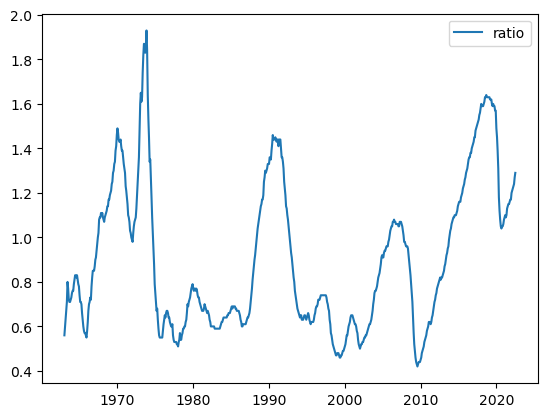

In [8]:
import seaborn as sns
sns.lineplot(data=df_jobs)

### 景気ウォッチャー調査

景気に敏感な職種の人々へのインタビュー結果を集計した「街角景気」<br>
https://www5.cao.go.jp/keizai3/watcher/watcher_menu.html

In [9]:
# Excelファイルの読み込み
# - skiprows: 先頭行の読み飛ばし
# - usecols: 使用する列の指定
df_watcher = pd.read_excel('data/watcher5.xls', skiprows=range(0,3), usecols='B:D')

# 不要な2行の削除
df_watcher = df_watcher.drop([0, 1])

# 列インデックスの付け直し
df_watcher.columns = ['year', 'month', 'watcher']

# '年'の除去
df_watcher.year.replace('年', '', regex=True, inplace=True)

# 行インデックスを年月の属性に置き換える
# 最初の年、月を取得、整数に変換
y = int(df_watcher.head(1).year)
m = int(df_watcher.head(1).month)

# 文字列に再変換 '2002-01'
start_date = '{}-{:02}'.format(y, m)

# 年月の区間を生成し、行インデックスとして指定
# - start: 開始日
# - freq: 間隔 'MS' 月間隔、月の最初の日
# - periods: 繰り返し回数
watcher_range = pd.date_range(start=start_date, freq='MS', periods=len(df_watcher))
df_watcher.index = watcher_range

# 不要な列の削除
df_watcher = df_watcher.drop(['year', 'month'], axis=1)

### 求人倍率と街角景気の関係

- 折れ線グラフを重ねて描画

<AxesSubplot:ylabel='watcher'>

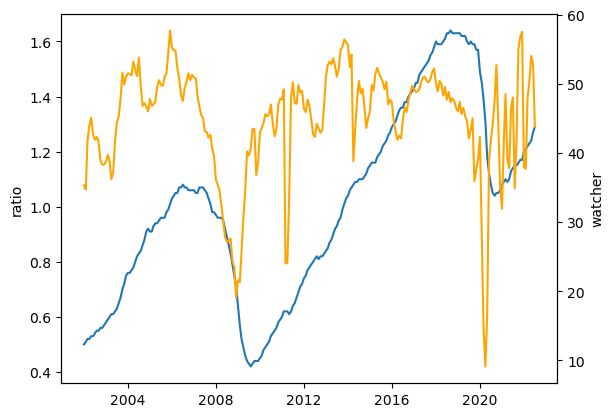

In [10]:
import matplotlib.pyplot as plt

# 2つのスケールが異なるグラフを重ねたいため、描画エリアのオブジェクトを取得
fig, ax = plt.subplots()
# 最初のグラフを描画
sns.lineplot(data=df_jobs.ratio.loc[df_watcher.index[0]:df_jobs.index[-1]], ax=ax)
# 2軸目の領域を取得
ax2 = ax.twinx()
# - ax: 2軸目を指定して、2つめのグラフを描画
sns.lineplot(data=df_watcher.watcher.loc[df_watcher.index[0]:df_jobs.index[-1]], ax=ax2, color='orange')

## Excelファイルを操作するためのパッケージ

以下のパッケージを利用することで、Excelファイルに対する操作を自動化することが可能：
- openpyxl
- XlsxWriter